In [3]:
!pip install numpy pandas matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [27]:
# Introduction
#
# A consistent part of life is stress, especially so for college students. Much like life, stress is complex and can stem from many different factors
# including those that are psychological, physiological, environmental, and more. The goal of this analysis is to discover if any trends or more knowledge
# can be ascertained from the two datasets regarding stress factors amongst college students around ages 18 to 21. 
#
# Datasets
#
# For this analysis, we will be using "Student Stress Monitoring Datasets", which consists of two datasets that consist of survey data taken from college
# students nationwide. The first data set contains 20 features: anxiety_level, self_esteem, mental_health_history, depression, headache, blood_pressure,
# sleep_quality, breathing_problem, noise_level, living_conditions, basic_needs, academic_performance, study_load, teacher_student_relationship, 
# future_career_concerns, social_support, peer_pressure, extracurricular_activities, bullying, stress_level. The second dataset includes features: Gender,
# Age, Recent_Stress, Have you noticed a rapid heartbeat or palpitations?, Have you been dealing with anxiety or tension recently?, 
# Do you face any sleep problems or difficulties falling asleep?, Have you been dealing with anxiety or tension recently?.1, 
# Have you been getting headaches more often than usual?, Do you get irritated easily?, Do you have trouble concentrating on your academic tasks?, 
# Do you find that your relationship often causes you stress?, Are you facing any difficulties with your professors or instructors?,
# Is your working environment unpleasant or stressful?, Do you struggle to find time for relaxation and leisure activities?,
# Is your hostel or home environment causing you difficulties?, Do you lack confidence in your academic performance?, 
# Do you lack confidence in your choice of academic subjects?, Academic and extracurricular activities conflicting for you?,
# Do you attend classes regularly?, and Have you gained/lost weight?. 

# Link: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/data

In [23]:
stress_raw = pd.read_csv("StressLevelDataset.csv")

In [5]:
stress_raw.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [6]:
stress_raw.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [ ]:
# Correlation
# With this correlation matrix we are able to identify which features can be linked more closely to stress levels. At a glance we can see that a few
# factors stand out as being more closely correlated to stress levels such as anxiety, depression, headaches, future career concerns, peer pressure,
# extracurricular activities, and bullying. It is interesting that these features that stem from within and those that relate to external negative events
# seem to carry the highest correlation to increased stress levels.

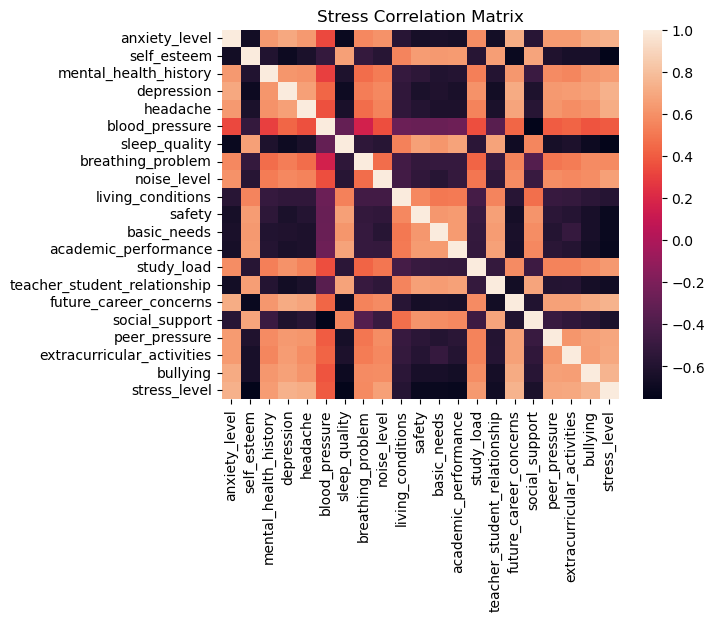

In [7]:
df = stress_raw.dropna()
sns.heatmap(df.corr())
plt.title('Stress Correlation Matrix')
plt.show()

In [8]:
questionairre_raw = pd.read_csv("Stress_Dataset.csv")

In [25]:
questionairre_raw.describe()

,Gender,Age,Recent_Stress,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.663108,2.628707,2.702254,2.699881,...,2.514828,2.447212,2.488731,2.517200,2.424674,2.581257,2.641756,2.756821,3.258600,2.398577
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266376,1.266593,1.314213,1.313673,...,1.241869,1.195995,1.196116,1.247563,1.256795,1.288163,1.305848,1.263008,1.202543,1.112485
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
questionairre_raw.isna().sum()

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

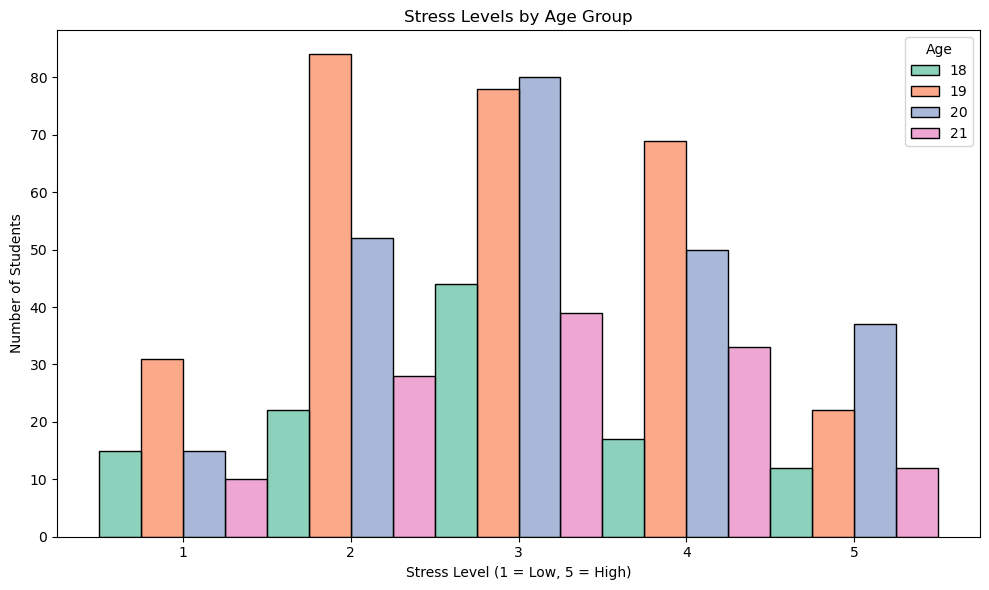

In [10]:
df = questionairre_raw
df.columns = df.columns.str.strip()
df.rename(columns = {'Have you recently experienced stress in your life?': 'Recent_Stress'}, inplace = True)
df = df[df['Age'].isin([18, 19, 20, 21])]
plt.figure(figsize=(10,6))
sns.histplot(data = df, x='Recent_Stress', hue='Age', multiple='dodge', bins=5, binrange=(1,5), palette='Set2', discrete=True)
plt.title('Stress Levels by Age Group')
plt.xlabel('Stress Level (1 = Low, 5 = High)')
plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()